## Problème du voyageur de commerce par le Recuit Simulé

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [29]:
N = 10
T0 = 15
T = T0
Tmin = 1e-2
tau = 1e2
beta = 1e-1
k=0
t=0



In [30]:
# Fonction de cout

def cout():
    global chemin
    energie = 0
    xy = np.column_stack((x[chemin], y[chemin]))
    energie = np.sum(np.sqrt(np.sum((xy-np.roll(xy,-1,axis=0))**2,axis=1)))
    return(energie)

In [31]:
# Fonction de déplacement

def depl(ville1,ville2):
    global chemin
    Min = min(ville1,ville2)
    Max = max(ville1,ville2)
    chemin[Min:Max]=chemin[Min:Max].copy()[::-1]
    return

In [32]:
# Coordonnées des villes

x = np.random.uniform(0,1,N)
y = np.random.uniform(0,1,N)

# Chemin initial

chemin = np.arange(N)
chemin1 = chemin.copy()

# Distance du chemin initial

cout_courant = cout()

print('k =' ,k, 'Chemin :', chemin, 'Distance du chemin = ', cout_courant, 'Température = ', T)


k = 0 Chemin : [0 1 2 3 4 5 6 7 8 9] Distance du chemin =  7.527115315804832 Température =  15


In [33]:
# Coordonnées des villes

x = np.random.uniform(0,1,N)
y = np.random.uniform(0,1,N)

# Chemin initial

chemin = np.arange(N)
chemin1 = chemin.copy()

# Distance du chemin initial

cout_courant = cout()

print('k =' ,k, 'Chemin :', chemin, 'Distance du chemin = ', cout_courant, 'Température = ', T)


# Recuit simulé

while T>Tmin:
    ville_voisine = rd.randint(0,N-1)
    ville_courante = rd.randint(0,N-1)
    if ville_voisine == ville_courante : continue

    # On se déplace
    depl(ville_voisine, ville_courante)

    # Le cout

    cout_new = cout()

    if cout_new <= cout_courant:
        cout_courant = cout_new
    else:
        dE = cout_new-cout_courant
        if beta > np.exp(-dE/T):
            depl(ville_voisine, ville_courante) # rejet du nouveau chemin
        else : 
            cout_courant = cout_new # acceptation du nouveau chemin même si elle n'améliore pas le cout
    t+=1
    T = T0*np.exp(-t/tau)
    k+=1
    print('k =' ,k, 'Chemin :', chemin, 'Distance du chemin = ', cout_courant, 'Température = ', T)

k = 0 Chemin : [0 1 2 3 4 5 6 7 8 9] Distance du chemin =  6.394149112697409 Température =  15
k = 1 Chemin : [4 3 2 1 0 5 6 7 8 9] Distance du chemin =  6.592406700985768 Température =  14.850747506237521
k = 2 Chemin : [4 3 6 5 0 1 2 7 8 9] Distance du chemin =  6.5753584668329195 Température =  14.702980099601328
k = 3 Chemin : [0 5 6 3 4 1 2 7 8 9] Distance du chemin =  6.672971433097716 Température =  14.556683003227622
k = 4 Chemin : [0 5 6 3 4 1 2 7 8 9] Distance du chemin =  6.672971433097716 Température =  14.411841587284847
k = 5 Chemin : [0 6 5 3 4 1 2 7 8 9] Distance du chemin =  6.447024210303663 Température =  14.268441367510711
k = 6 Chemin : [0 6 5 3 4 1 2 7 8 9] Distance du chemin =  6.447024210303663 Température =  14.126468003763732
k = 7 Chemin : [0 6 5 3 7 2 1 4 8 9] Distance du chemin =  6.195601646673504 Température =  13.985907298589224
k = 8 Chemin : [0 6 5 3 7 2 4 1 8 9] Distance du chemin =  5.699176884474973 Température =  13.846745195799537
k = 9 Chemin : [

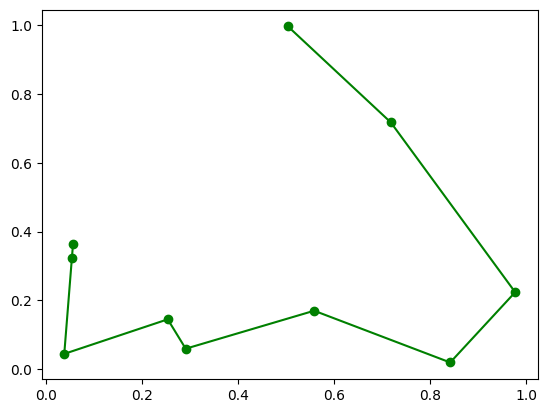

In [34]:
plt.plot(x[chemin], y[chemin], marker='o', color ='g')

## Trois méthodes pour résoudre le problème du voyageur de commerce

#### Force brute

In [42]:
import itertools
import numpy as np
calls = 0
def calculate_distance(route, distance_matrix):
    global calls
    calls+=1
    return sum(distance_matrix[route[i-1]][route[i]] for i in range(len(route)))

def tsp_brute_force(distance_matrix):
    n = len(distance_matrix)
    best_route = None
    min_distance = float('inf')
    k=0
    
    for perm in itertools.permutations(range(1, n)):
        route = (0,) + perm + (0,)
        distance = calculate_distance(route, distance_matrix)
        if distance < min_distance:
            min_distance = distance
            best_route = route
        k+=1
    
    return best_route, min_distance,k

np.random.seed(42)  # Pour la reproductibilité
n_cities = 5
distance_matrix = np.random.randint(1, 10, size=(n_cities, n_cities))

# Rendre la matrice symétrique pour représenter des distances bidirectionnelles
distance_matrix = (distance_matrix + distance_matrix.T) / 2
np.fill_diagonal(distance_matrix, 0)

route, distance,k = tsp_brute_force(distance_matrix)
print(f"Meilleure route: {route} avec distance: {distance}", 'Nb itérations :', calls)



Meilleure route: (0, 1, 2, 3, 4, 0) avec distance: 24.5 Nb itérations : 24


#### Recuit simulé

In [41]:
import random
import math
calls = 0
def calculate_distance(route, distance_matrix):
    global calls
    calls+=1
    return sum(distance_matrix[route[i-1]][route[i]] for i in range(len(route)))

def tsp_simulated_annealing(distance_matrix, initial_temp=1000, cooling_rate=0.995, min_temp=0.01):
    def get_neighbors(route):
        neighbors = []
        for i in range(1, len(route) - 1):
            for j in range(i + 1, len(route)):
                neighbor = route[:]
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                neighbors.append(neighbor)
        return neighbors

    def acceptance_probability(old_cost, new_cost, temperature):
        if new_cost < old_cost:
            return 1.0
        return math.exp((old_cost - new_cost) / temperature)

    n = len(distance_matrix)
    current_route = list(range(n))
    random.shuffle(current_route)
    current_route.append(current_route[0])
    current_distance = calculate_distance(current_route, distance_matrix)
    
    best_route = current_route
    best_distance = current_distance
    
    temperature = initial_temp
    k = 0
    while temperature > min_temp:
        k+=1
        neighbors = get_neighbors(current_route)
        new_route = random.choice(neighbors)
        new_distance = calculate_distance(new_route, distance_matrix)
        
        if acceptance_probability(current_distance, new_distance, temperature) > random.random():
            current_route = new_route
            current_distance = new_distance
            
            if current_distance < best_distance:
                best_route = current_route
                best_distance = current_distance
        
        temperature *= cooling_rate
    
    return best_route, best_distance,k

np.random.seed(42)  # Pour la reproductibilité
n_cities = 5
distance_matrix = np.random.randint(1, 10, size=(n_cities, n_cities))

# Rendre la matrice symétrique pour représenter des distances bidirectionnelles
distance_matrix = (distance_matrix + distance_matrix.T) / 2
np.fill_diagonal(distance_matrix, 0)

route, distance,k = tsp_simulated_annealing(distance_matrix)
print(f"Meilleure route: {route} avec distance: {distance}", 'Nb itérations :', calls)


Meilleure route: [2, 1, 0, 4, 3, 2] avec distance: 24.5 Nb itérations : 2298


#### ACO

In [40]:
import numpy as np
import random
calls = 0
class AntColony:
    def __init__(self, distance_matrix, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distance_matrix = distance_matrix
        self.pheromone = np.ones(self.distance_matrix.shape) / len(distance_matrix)
        self.all_indices = range(len(distance_matrix))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path

    def gen_path_dist(self, path):
        total_dist = 0
        global calls
        calls+=1
        for i in range(1, len(path)):
            total_dist += self.distance_matrix[path[i-1]][path[i]]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = [start]
        visited = set()
        visited.add(start)
        prev = start
        for _ in range(len(self.distance_matrix) - 1):
            move = self.pick_move(self.pheromone[prev], self.distance_matrix[prev], visited)
            path.append(move)
            prev = move
            visited.add(move)
        path.append(start)  # Retourner au point de départ
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * ((1.0 / (dist + np.finfo(float).eps)) ** self.beta)
        if np.sum(row) == 0:
            move = np.random.choice(list(set(self.all_indices) - visited))
        else:
            norm_row = row / np.sum(row)
            move = np.random.choice(self.all_indices, 1, p=norm_row)[0]
        return move

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in zip(path[:-1], path[1:]):
                self.pheromone[move] += 1.0 / dist

# Génération d'une matrice de distances aléatoires pour 100 villes
np.random.seed(42)  # Pour la reproductibilité
n_cities = 5
distance_matrix = np.random.randint(1, 10, size=(n_cities, n_cities))

# Rendre la matrice symétrique pour représenter des distances bidirectionnelles
distance_matrix = (distance_matrix + distance_matrix.T) / 2
np.fill_diagonal(distance_matrix, 0)

# Exécution de l'algorithme des colonies de fourmis
ant_colony = AntColony(distance_matrix, 10, 5, 100, 0.95, alpha=1, beta=2)
shortest_path = ant_colony.run()
print(f"Meilleure route: {shortest_path[0][:10]}... avec distance: {shortest_path[1]}", 'Iterations = ', calls)


Meilleure route: [0, 4, 3, 2, 1, 0]... avec distance: 24.5 Iterations =  1000
